## Assignment 2

This assignmemt is based on content discussed in module 2 and will work on a solution for the famous Monty Hall game.  Retrieved from https://en.wikipedia.org/wiki/Monty_Hall_problem


## Learning outcomes

- Program a simple simulation to solve a concrete statistical problem
- Develop insight into the Bayesian probabilistic viewpoint
- Recognize that statistical intuition can sometimes be wrong


**Question**

Given below is the description of the problem.  

Suppose you're on a game show and you're given the choice of three doors. 

Behind one door is a car; behind the others, goats. The car and the goats were placed randomly behind the doors before the show.

The rules are:

After you have chosen a door, the door remains closed for the time being. 
The game show host, Monty Hall, who knows what is behind the doors, now has to open one of the two remaining doors, and the door he opens must have a goat behind it. If both remaining doors have goats behind them, he chooses one randomly. 

After Monty opens a door with a goat, he will ask you to decide whether you want to stay with your first choice or to switch to the last remaining door. 
Imagine that you chose Door 1 and the host opens Door 3, which has a goat. 
He then asks you "Do you want to switch to Door Number 2?" Is it to your advantage to change your choice? 

**NOTES:**
1. The player may initially choose any of the three doors (not just Door 1).
2. The host opens a different door revealing a goat (not necessarily Door 3).
3. The host gives the player a second choice between the two remaining unopened doors. 


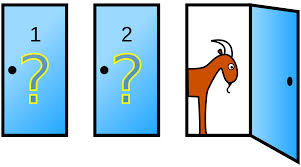

(Source: https://en.wikipedia.org/wiki/Monty_Hall_problem#)

- Write Python code to solve the Monty Hall problem. Simulate at least a thousand games using three doors for each strategy and show the results in such a way as to make it easy to compare the effects of each strategy.


The probability of winning a car if the participant decides to not change his initial choice is: 0.313 
Whereas the probability of winning if the participant changes his initial choice is: 0.687


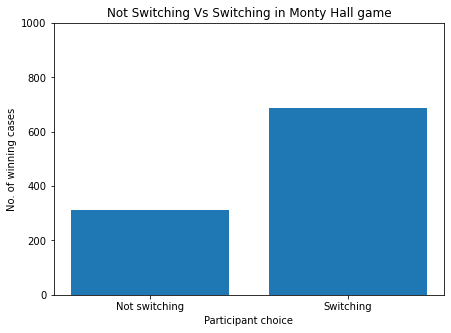

In [1]:
import random
import matplotlib.pyplot as plt
%matplotlib inline 

#Initial variables
n = 1000
notswitching_wins = 0
switching_wins = 0

doors = [1,2,3]
behind_doors = ['car','goat','goat']

for i in range(n):
    random.shuffle(behind_doors) #Shuffling the awards behind the door randomly
    game = dict(zip(doors, behind_doors)) #Assigning an award to a door in a dictionary

    participant_door = random.choice(doors) #Participant randomly chooses a door
    participant_choice = game[participant_door] #Keeping in a variable the first choice of the participant

    game.pop(participant_door) #Removing participant's door/award from the game

    for door, award in game.items(): #Choosing the door the host will reveal
        if award == 'goat': #Door revealed by the host will always be a goat
            host = door #There will always be at least one goat behind one of the doors left, thus, the host variable keeps either the only goat key left or the last one if both options left were goats

    # Not switching scenario
    if participant_choice=='car': #The participant remains with its original award and we count how many of them were a car (win)
        notswitching_wins = notswitching_wins+1

    # Switching scenario
    game.pop(host) #Eliminating the host choice and counting the times the remaining door/award was a car as if the participant changed the decision    
    if list(game.values())[0]=='car':
        switching_wins = switching_wins+1
    
p_notswitching = notswitching_wins/n
p_switching = switching_wins/n

choices = ['Not switching','Switching']
wins= [notswitching_wins,switching_wins]

print('The probability of winning a car if the participant decides to not change his initial choice is:',p_notswitching, '\nWhereas the probability of winning if the participant changes his initial choice is:',p_switching)

# Creating the bar plot
fig = plt.figure(figsize = (7, 5))
plt.bar(choices, wins)
plt.ylim([0,n])
plt.xlabel("Participant choice")
plt.ylabel("No. of winning cases")
plt.title("Not Switching Vs Switching in Monty Hall game")
plt.show()